<h1 style="display:flex; justify-content:center">
Projet PRBI24
</h1>

<h3 style="display:flex; justify-content:center; color:#bf1515">
Classification de chiffres manuscrits en exploitant l'algorithme des K-Moyennes
</h3>

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.cm as cm
from sklearn.metrics import silhouette_score, silhouette_samples
import sklearn

<h2>
I - Apprentissage
</h2>

In [2]:
# Path to file
file_path = './optdigits.tra'

# Charger le fichier
with open(file_path, 'r') as f:
    lines = f.readlines()

In [3]:
# Vérifions la structure d'une ligne de données
data_lines = lines[:5]  # Lire 5 lignes pour exemple
data_lines

['0,1,6,15,12,1,0,0,0,7,16,6,6,10,0,0,0,8,16,2,0,11,2,0,0,5,16,3,0,5,7,0,0,7,13,3,0,8,7,0,0,4,12,0,1,13,5,0,0,0,14,9,15,9,0,0,0,0,6,14,7,1,0,0,0\n',
 '0,0,10,16,6,0,0,0,0,7,16,8,16,5,0,0,0,11,16,0,6,14,3,0,0,12,12,0,0,11,11,0,0,12,12,0,0,8,12,0,0,7,15,1,0,13,11,0,0,0,16,8,10,15,3,0,0,0,10,16,15,3,0,0,0\n',
 '0,0,8,15,16,13,0,0,0,1,11,9,11,16,1,0,0,0,0,0,7,14,0,0,0,0,3,4,14,12,2,0,0,1,16,16,16,16,10,0,0,2,12,16,10,0,0,0,0,0,2,16,4,0,0,0,0,0,9,14,0,0,0,0,7\n',
 '0,0,0,3,11,16,0,0,0,0,5,16,11,13,7,0,0,3,15,8,1,15,6,0,0,11,16,16,16,16,10,0,0,1,4,4,13,10,2,0,0,0,0,0,15,4,0,0,0,0,0,3,16,0,0,0,0,0,0,1,15,2,0,0,4\n',
 '0,0,5,14,4,0,0,0,0,0,13,8,0,0,0,0,0,3,14,4,0,0,0,0,0,6,16,14,9,2,0,0,0,4,16,3,4,11,2,0,0,0,14,3,0,4,11,0,0,0,10,8,4,11,12,0,0,0,4,12,14,7,0,0,6\n']

In [4]:
all_numbers = []  # va contenir toutes les lignes sous forme de liste de nombres

with open(file_path, 'r') as f:
    lines = f.readlines()
    for line in lines:
        line = line.strip()  # enlève le \n à la fin
        numbers = [int(n) for n in line.split(',') if n.strip() != '']  # transforme en int
        all_numbers.append(numbers)

# Exemple : afficher la première ligne
print(f"Nombre de lignes : {len(all_numbers)}")
print(f"Taille de colonnes : {len(all_numbers[0])}")
print(f"Contenu : {all_numbers[0]}")


Nombre de lignes : 3823
Taille de colonnes : 65
Contenu : [0, 1, 6, 15, 12, 1, 0, 0, 0, 7, 16, 6, 6, 10, 0, 0, 0, 8, 16, 2, 0, 11, 2, 0, 0, 5, 16, 3, 0, 5, 7, 0, 0, 7, 13, 3, 0, 8, 7, 0, 0, 4, 12, 0, 1, 13, 5, 0, 0, 0, 14, 9, 15, 9, 0, 0, 0, 0, 6, 14, 7, 1, 0, 0, 0]


In [5]:
with open(file_path, 'r') as f:
    lines = f.readlines()
    data = [ [int(n) for n in line.strip().split(',') if n.strip() != ''] for line in lines ]

numbers = np.array(data)
print(f"Nombre de lignes : {len(numbers)}")
print(f"Taille de colonnes : {len(numbers[0])}")
print(f"Contenu : {numbers[0]}")

Nombre de lignes : 3823
Taille de colonnes : 65
Contenu : [ 0  1  6 15 12  1  0  0  0  7 16  6  6 10  0  0  0  8 16  2  0 11  2  0
  0  5 16  3  0  5  7  0  0  7 13  3  0  8  7  0  0  4 12  0  1 13  5  0
  0  0 14  9 15  9  0  0  0  0  6 14  7  1  0  0  0]


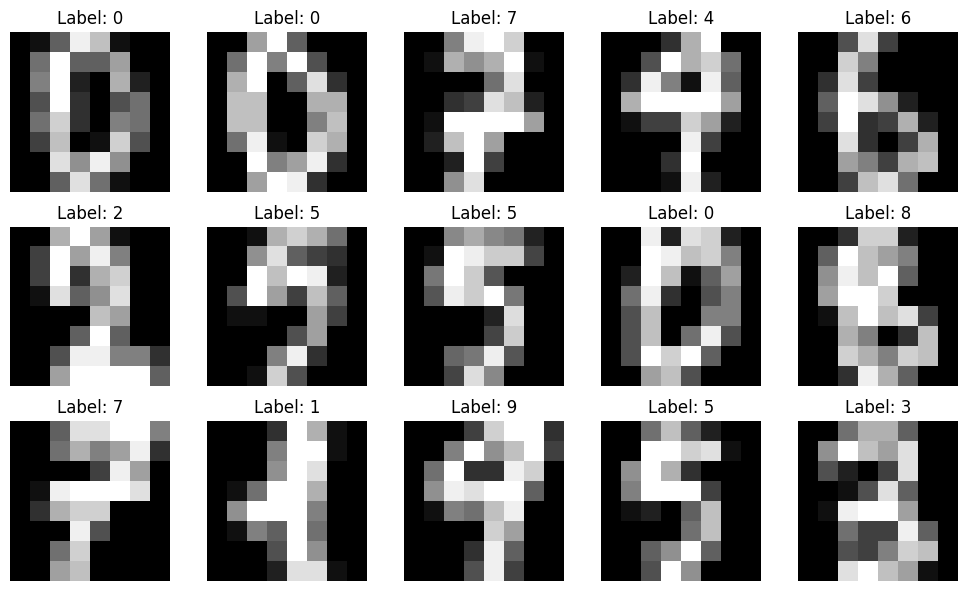

In [6]:
all_images = []
all_labels = []

for number in numbers :
    pixels = number[:-1]  # les 64 premiers
    label = number[-1]    # le dernier
    all_images.append(pixels)
    all_labels.append(label)

# Convertir en array NumPy pour manipuler facilement
images_array = np.array(all_images)  # shape (n_samples, 64)
labels_array = np.array(all_labels)  # shape (n_samples,)

# Visualisation de plusieurs images au hasard
fig, axes = plt.subplots(3, 5, figsize=(10,6))  # 15 images
for i, ax in enumerate(axes.flat):
    ax.imshow(images_array[i].reshape(8,8), cmap='gray', interpolation='nearest')
    ax.set_title(f"Label: {labels_array[i]}")
    ax.axis('off')

plt.tight_layout()
plt.show()


C:\Users\zakel\AppData\Local\Temp\ipykernel_5756\190775936.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df, x='Label', y='Count', palette='viridis')


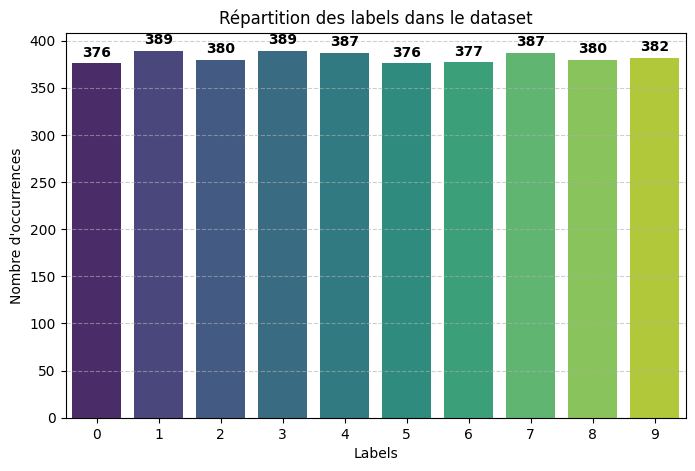

In [ ]:
# Compter les occurrences de chaque label
unique_labels, counts = np.unique(all_labels, return_counts=True)

# DataFrame pour Seaborn
df = pd.DataFrame({'Label': unique_labels, 'Count': counts})

# Plot Seaborn
plt.figure(figsize=(8,5))
ax = sns.barplot(data=df, x='Label', y='Count', palette='viridis')

plt.xlabel('Labels')
plt.ylabel('Nombre d\'occurrences')
plt.title('Répartition des labels dans le dataset')
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Ajouter les valeurs au-dessus des barres
for i, count in enumerate(counts):
    ax.text(i, count + max(counts)*0.01, str(count), ha='center', va='bottom', fontweight='bold')

plt.show()

In [8]:
# Le dernier champ est le label (classe 0..9), les 64 premiers sont les pixels
X = numbers[:, :-1]  # Features (8x8 = 64)
y = numbers[:, -1]   # Labels

# K-means clustering
kmeans = KMeans(n_clusters=10, random_state=42, n_init='auto')
clusters = kmeans.fit_predict(X)

# Convertir en DataFrame pour analyse
df = pd.DataFrame(X)
df['label'] = y
df['cluster'] = clusters

# Histogramme par cluster : tableau croisé
cluster_summary = pd.crosstab(df['cluster'], df['label'])

print(cluster_summary.head(10))

label      0    1    2    3    4    5    6    7    8    9
cluster                                                  
0        372    0    1    0    0    0    0    0    0    0
1          0    8    8   12    0   84    0    0   77  253
2          1  137    0    4   31    4    0    6    5   88
3          0   17  342    3    0    0    1    0    1    0
4          0    2   10    5   32    0    0  374    5   25
5          1  219   11    7    3    4    1    7  273    4
6          0    3    7  356    0    4    0    0    8   10
7          1    0    0    0  310    0    1    0    0    0
8          0    1    0    2    7  279    0    0    3    2
9          1    2    1    0    4    1  374    0    8    0


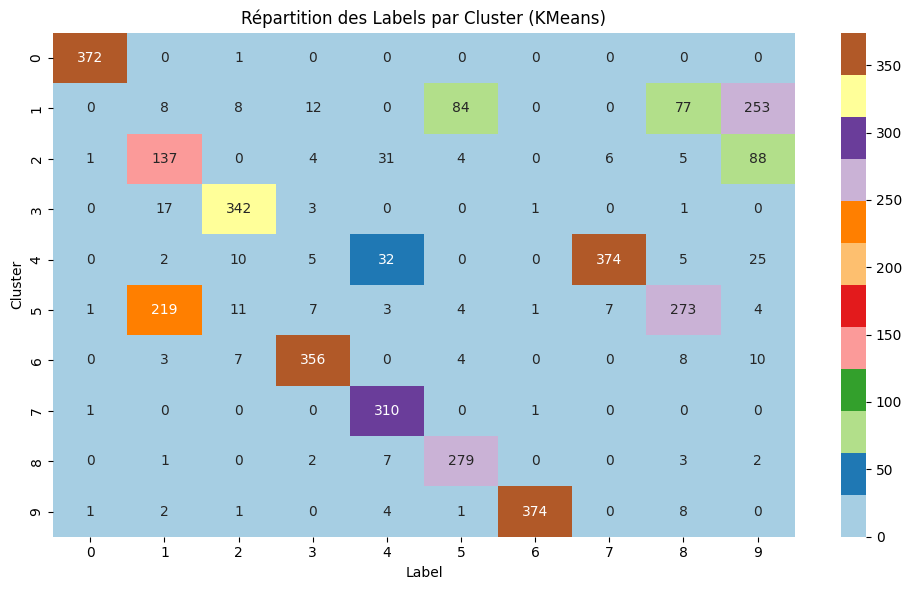

In [9]:
# 1 seul run pour visualiser
kmeans = KMeans(n_clusters=10, random_state=42, n_init='auto')
clusters = kmeans.fit_predict(X)

# Associer les clusters aux labels
df = pd.DataFrame(X)
df['label'] = y
df['cluster'] = clusters

# Crosstab = tableau cluster x label (nb d'occurrences)
cluster_summary = pd.crosstab(df['cluster'], df['label'])

# Heatmap visuelle
plt.figure(figsize=(10,6))
sns.heatmap(cluster_summary, annot=True, fmt='d', cmap='Paired')
plt.title('Répartition des Labels par Cluster (KMeans)')
plt.xlabel('Label')
plt.ylabel('Cluster')
plt.tight_layout()
plt.show()


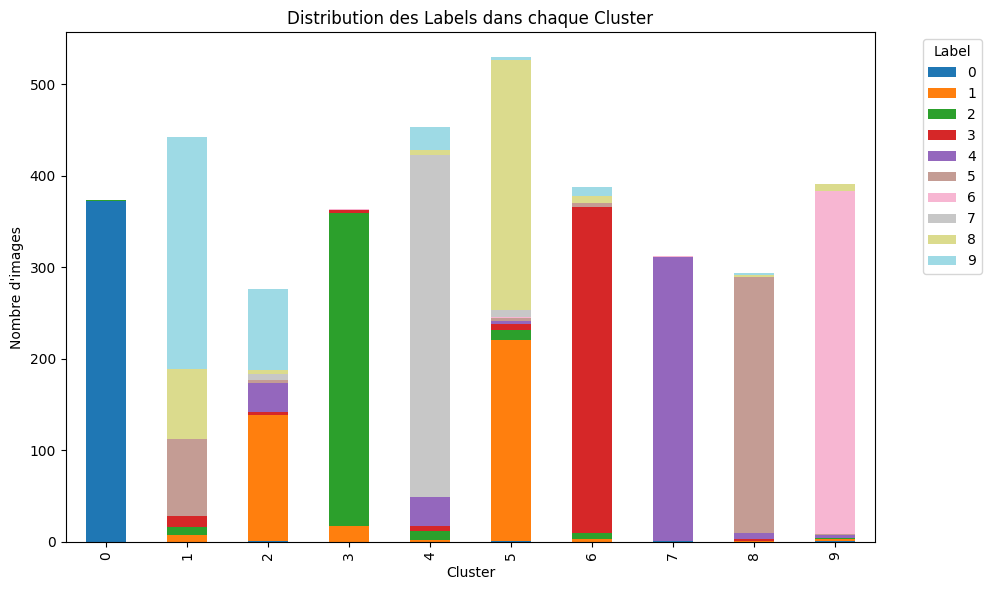

In [ ]:
# Préparer DataFrame pour barplot empilé
cluster_summary = pd.crosstab(df['cluster'], df['label'])

# Barplot empilé
cluster_summary.plot(kind='bar', stacked=True, figsize=(10,6), colormap='tab20')
plt.title('Distribution des Labels dans chaque Cluster')
plt.xlabel('Cluster')
plt.ylabel('Nombre d\'images')
plt.legend(title='Label', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


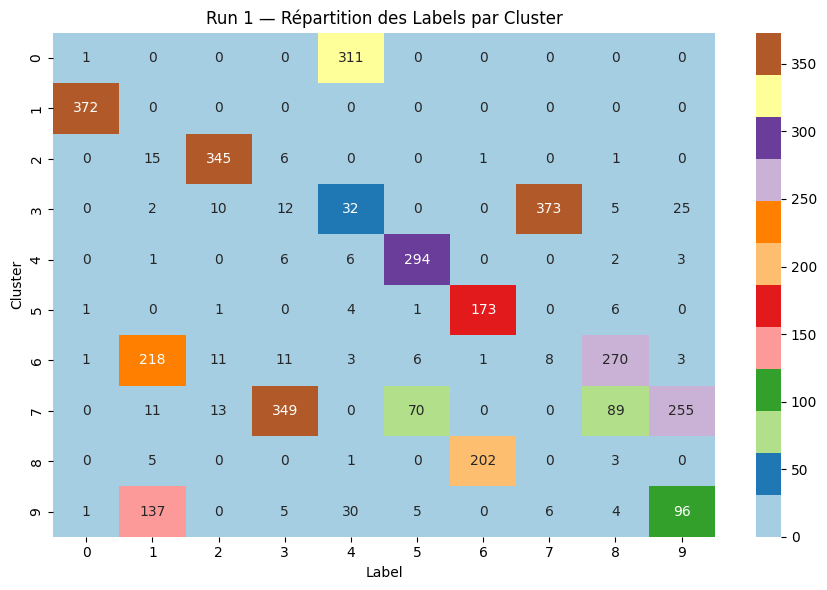

Indice de silhouette moyen : 0.1756


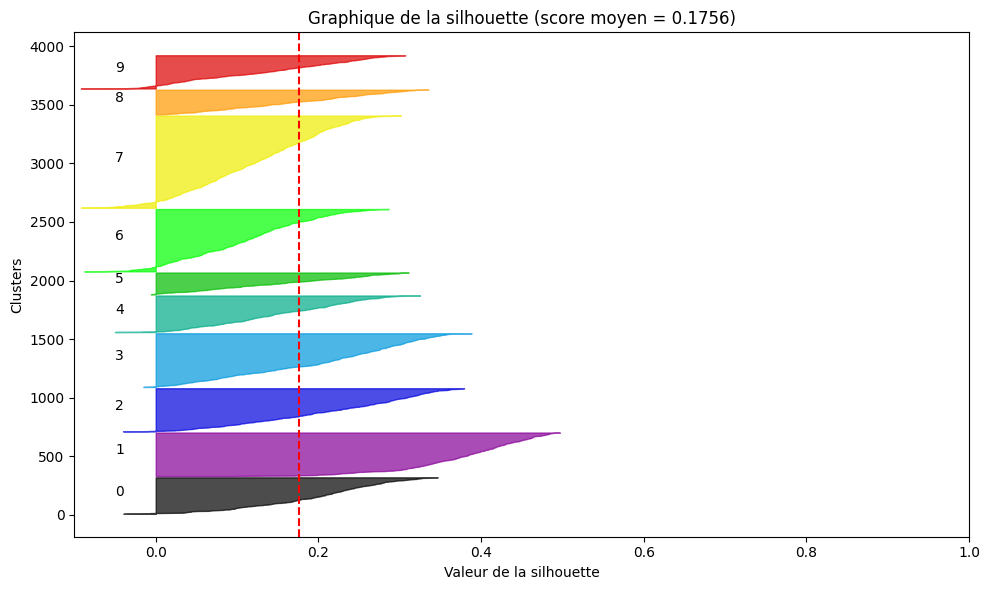

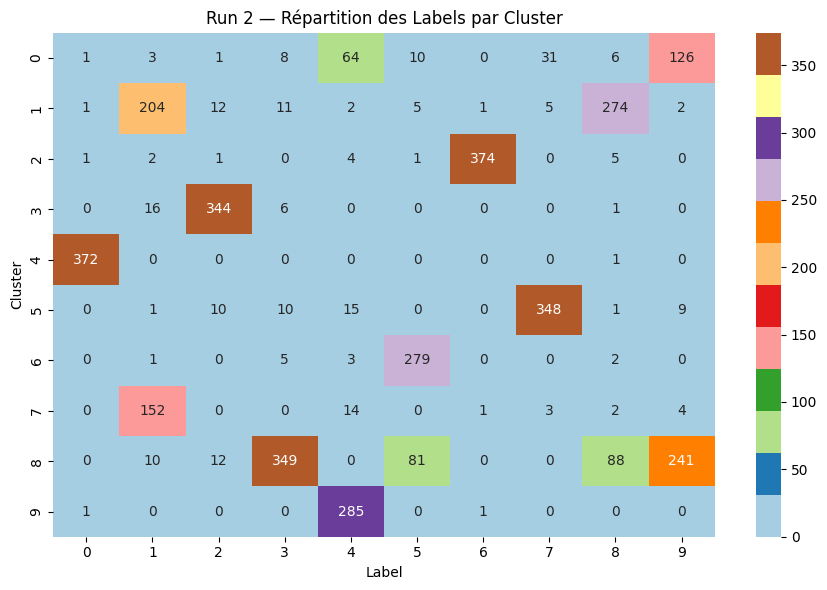

Indice de silhouette moyen : 0.1890


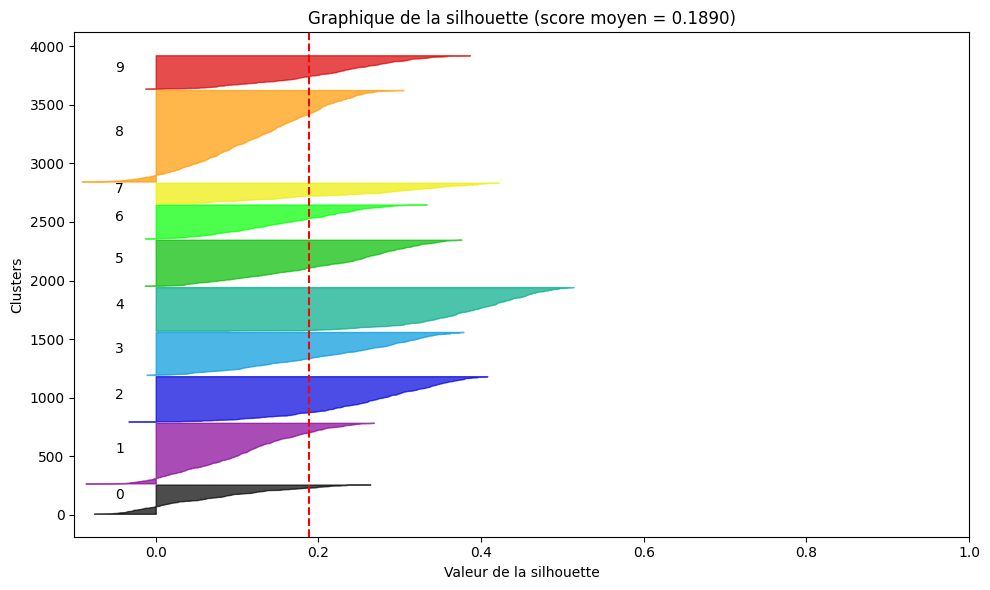

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from scipy.stats import mode
import numpy as np

# Préparer les données
X = np.array(all_images)
y = np.array(all_labels)

n_runs = 2  # nombre de clustering différents

for run in range(n_runs):
    kmeans = KMeans(n_clusters=10, random_state=run, n_init='auto')
    clusters = kmeans.fit_predict(X)

    # DataFrame pour analyse
    df = pd.DataFrame(X)
    df['label'] = y
    df['cluster'] = clusters

    # Crosstab cluster vs label
    cluster_summary = pd.crosstab(df['cluster'], df['label'])

    # --- Heatmap ---
    plt.figure(figsize=(9,6))
    sns.heatmap(cluster_summary, annot=True, fmt='d', cmap='Paired')
    plt.title(f'Run {run+1} — Répartition des Labels par Cluster')
    plt.xlabel('Label')
    plt.ylabel('Cluster')
    plt.tight_layout()
    plt.show()

    sil_score = silhouette_score(X, clusters)
    print(f"Indice de silhouette moyen : {sil_score:.4f}")

    # Calcul des silhouettes individuelles
    sample_silhouette_values = silhouette_samples(X, clusters)

    plt.figure(figsize=(10,6))
    y_lower = 10
    for i in range(10):  # pour chaque cluster
        ith_cluster_silhouette_values = sample_silhouette_values[clusters == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / 10)
        plt.fill_betweenx(np.arange(y_lower, y_upper),
                        0, ith_cluster_silhouette_values,
                        facecolor=color, edgecolor=color, alpha=0.7)

        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10  # 10 de gap entre clusters

    plt.xlabel("Valeur de la silhouette")
    plt.ylabel("Clusters")
    plt.title(f"Graphique de la silhouette (score moyen = {sil_score:.4f})")
    plt.axvline(x=sil_score, color="red", linestyle="--")
    plt.xlim([-0.1, 1])
    plt.tight_layout()
    plt.show()


## 📊 1. **Interprétation d'un score moyen de silhouette**

### ➤ Rappel : échelle du score silhouette
| Score Silhouette     | Interprétation rapide                     |
|----------------------|-------------------------------------------|
| 0.71 – 1.0           | Clustering **excellent** 🟢                |
| 0.51 – 0.70          | Clustering **correct/bien**               |
| 0.26 – 0.50          | Clustering **moyen**                      |
| 0.0  – 0.25          | Clustering **faible / bruit / confusion** 🔴 |
| < 0                  | Mauvais, points dans le **mauvais cluster** ⚠️ |

---

## 2. **Interprétation d'un graphe de silhouette**

### Ce que tu vois :
- Chaque **bande horizontale** représente **un cluster**.
- La **longueur** de la bande = **valeurs de silhouette** pour les points de ce cluster.
- La **ligne rouge** verticale = **score moyen global** (ici 0.1890).

### Comment lire ça :
- Plus les bandes sont **larges à droite** (vers 1), mieux c’est.
- Les bandes **qui vont à gauche de 0** → ⚠️ **mauvais clustering** pour ces points (ils sont peut-être mal placés).


## 3. **Interprétation globale** :

- **score = 0.1890** est **proche de 0**, donc :
  - Les clusters sont **faiblement séparés**.
  - Les points sont **moyennement bien** dans leur cluster → un peu de confusion entre clusters.

- Le clustering **n’est pas optimal** avec 10 clusters ici.
- Probablement que :
  - Les données **se recoupent trop** pour KMeans (peut-être besoin de PCA ou autre clustering).
  - Ou le **k=10** n’est pas idéal.

---

##  Que faire ?
- Teste **d’autres k (nb de clusters)** → et trace la **silhouette moyenne en fonction de k**.
- Applique **PCA** pour **réduire la dimensionnalité** → clustering souvent meilleur.
- Teste d’autres algos : **DBSCAN, Agglomerative, GaussianMixture** ?

K=10 --> Silhouette Score = 0.1917
K=11 --> Silhouette Score = 0.1830
K=12 --> Silhouette Score = 0.1838
K=13 --> Silhouette Score = 0.1812
K=14 --> Silhouette Score = 0.1739
K=15 --> Silhouette Score = 0.1763
K=16 --> Silhouette Score = 0.1742
K=17 --> Silhouette Score = 0.1680
K=18 --> Silhouette Score = 0.1423
K=19 --> Silhouette Score = 0.1556
K=20 --> Silhouette Score = 0.1492


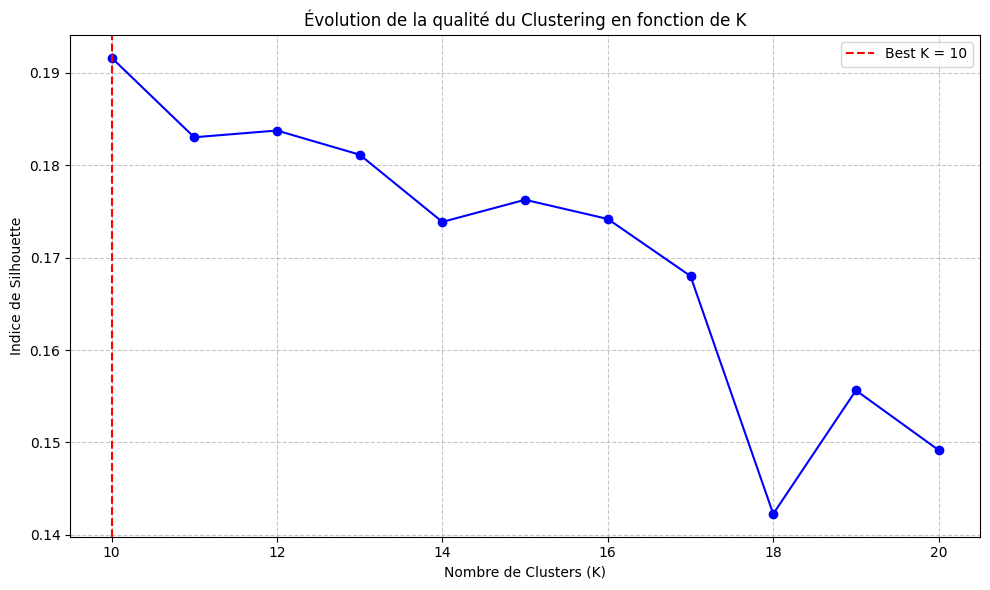


 Meilleur K = 10 avec un score de silhouette de 0.1917


In [12]:
X = numbers[:, :-1]  # Features (8x8 = 64)

k_values = range(10, 21)  # K de 10 à 20
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init='auto')
    clusters = kmeans.fit_predict(X)

    sil_score = silhouette_score(X, clusters)
    silhouette_scores.append(sil_score)

    print(f"K={k} --> Silhouette Score = {sil_score:.4f}")

# Visualisation : K vs Silhouette Score
plt.figure(figsize=(10,6))
plt.plot(k_values, silhouette_scores, marker='o', linestyle='-', color='b')
plt.xlabel('Nombre de Clusters (K)')
plt.ylabel('Indice de Silhouette')
plt.title('Évolution de la qualité du Clustering en fonction de K')
plt.grid(True, linestyle='--', alpha=0.7)

# Afficher le meilleur K
best_k = k_values[np.argmax(silhouette_scores)]
best_score = max(silhouette_scores)
plt.axvline(x=best_k, color='red', linestyle='--', label=f'Best K = {best_k}')
plt.legend()
plt.tight_layout()
plt.show()

print(f"\n Meilleur K = {best_k} avec un score de silhouette de {best_score:.4f}")


### On va répéter plusieurs fois l'opération et regarder en moyenne quelle est le meilleur cas


🔁 Run 1/10
K=10 --> Silhouette Score = 0.1837
K=11 --> Silhouette Score = 0.1838
K=12 --> Silhouette Score = 0.1839
K=13 --> Silhouette Score = 0.1836
K=14 --> Silhouette Score = 0.1822
K=15 --> Silhouette Score = 0.1682
K=16 --> Silhouette Score = 0.1736
K=17 --> Silhouette Score = 0.1568
K=18 --> Silhouette Score = 0.1692
K=19 --> Silhouette Score = 0.1458
K=20 --> Silhouette Score = 0.1481

🔁 Run 2/10
K=10 --> Silhouette Score = 0.1883
K=11 --> Silhouette Score = 0.1926
K=12 --> Silhouette Score = 0.1843
K=13 --> Silhouette Score = 0.1777
K=14 --> Silhouette Score = 0.1599
K=15 --> Silhouette Score = 0.1737
K=16 --> Silhouette Score = 0.1726
K=17 --> Silhouette Score = 0.1712
K=18 --> Silhouette Score = 0.1665
K=19 --> Silhouette Score = 0.1686
K=20 --> Silhouette Score = 0.1763

🔁 Run 3/10
K=10 --> Silhouette Score = 0.1818
K=11 --> Silhouette Score = 0.1695
K=12 --> Silhouette Score = 0.1891
K=13 --> Silhouette Score = 0.1805
K=14 --> Silhouette Score = 0.1779
K=15 --> Silhouette

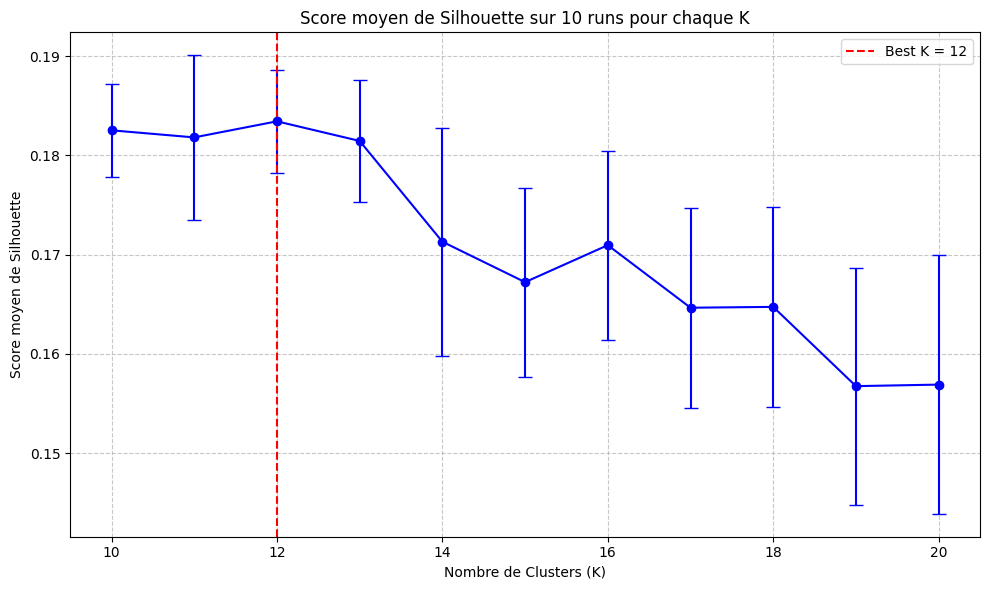


 Meilleur K en moyenne = 12 avec un score moyen de 0.1834


In [13]:
X = numbers[:, :-1]  # Features
n_runs = 10
k_values = range(10, 21)

# Stocker tous les scores pour chaque K, sur tous les runs
all_scores = {k: [] for k in k_values}

for run in range(n_runs):
    print(f"\n🔁 Run {run+1}/{n_runs}")
    for k in k_values:
        kmeans = KMeans(n_clusters=k, n_init='auto')  # random_state non fixé = variation
        clusters = kmeans.fit_predict(X)

        sil_score = silhouette_score(X, clusters)
        all_scores[k].append(sil_score)
        print(f"K={k} --> Silhouette Score = {sil_score:.4f}")

# Moyenne et écart-type pour chaque K
mean_scores = []
std_scores = []

for k in k_values:
    mean = np.mean(all_scores[k])
    std = np.std(all_scores[k])
    mean_scores.append(mean)
    std_scores.append(std)
    print(f"K={k} --> Moyenne Silhouette = {mean:.4f}, Écart-type = {std:.4f}")

# Visualisation
plt.figure(figsize=(10,6))
plt.errorbar(k_values, mean_scores, yerr=std_scores, fmt='-o', capsize=5, color='b')
plt.xlabel('Nombre de Clusters (K)')
plt.ylabel('Score moyen de Silhouette')
plt.title(f'Score moyen de Silhouette sur {n_runs} runs pour chaque K')
plt.grid(True, linestyle='--', alpha=0.7)

# Meilleur K en moyenne
best_k_index = np.argmax(mean_scores)
best_k = k_values[best_k_index]
best_mean_score = mean_scores[best_k_index]
plt.axvline(x=best_k, color='red', linestyle='--', label=f'Best K = {best_k}')
plt.legend()
plt.tight_layout()
plt.show()

print(f"\n Meilleur K en moyenne = {best_k} avec un score moyen de {best_mean_score:.4f}")
